In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import requests
from pandas.io.json import json_normalize
#from geopy.geocoders import Nominatim
#from sodapy import Socrata
#from pygeocoder import Geocoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
unique_df = pd.read_csv("../data/unique_austin_shelter.csv")

In [3]:
unique_df.set_index("animal_id", inplace=True)

In [4]:
unique_df.columns

Index(['breed', 'color', 'date_in', 'found_location', 'intake_condition',
       'intake_type', 'name', 'sex', 'fixed', 'date_of_birth', 'date_out',
       'outcome_subtype', 'outcome_type', 'in_shelter', 'time_in_shelter',
       'age_in', 'age_out'],
      dtype='object')

#### Average time in shelter

In [5]:
(unique_df.date_out.apply(pd.to_datetime) - unique_df.date_in.apply(pd.to_datetime)).mean()

Timedelta('15 days 12:19:40.914530')

In [136]:
(unique_df.date_out.apply(pd.to_datetime) - unique_df.date_in.apply(pd.to_datetime)).max()

Timedelta('1026 days 21:15:00')

In [132]:
(unique_df.date_out.apply(pd.to_datetime) - unique_df.date_in.apply(pd.to_datetime)).min()

Timedelta('0 days 00:01:00')

#### Most common dog name

In [6]:
unique_df.name.value_counts().head()

Bella    269
Max      256
Daisy    203
Luna     193
Rocky    188
Name: name, dtype: int64

#### How many dogs don't have names

In [7]:
unique_df.name.isnull().value_counts()

False    31823
True      8207
Name: name, dtype: int64

#### Number of dogs adopted per outcome type

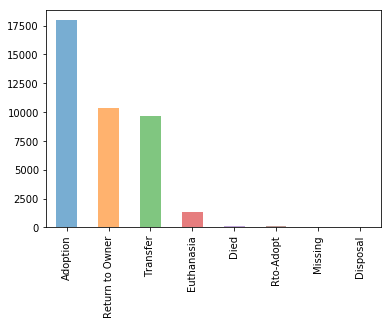

In [8]:
unique_df.outcome_type.value_counts().plot.bar(alpha=0.6)

In [9]:
unique_df.outcome_type.value_counts()

Adoption           17951
Return to Owner    10323
Transfer            9631
Euthanasia          1348
Died                 166
Rto-Adopt            160
Missing               12
Disposal              12
Name: outcome_type, dtype: int64

#### Does intake conditon affect outcome?

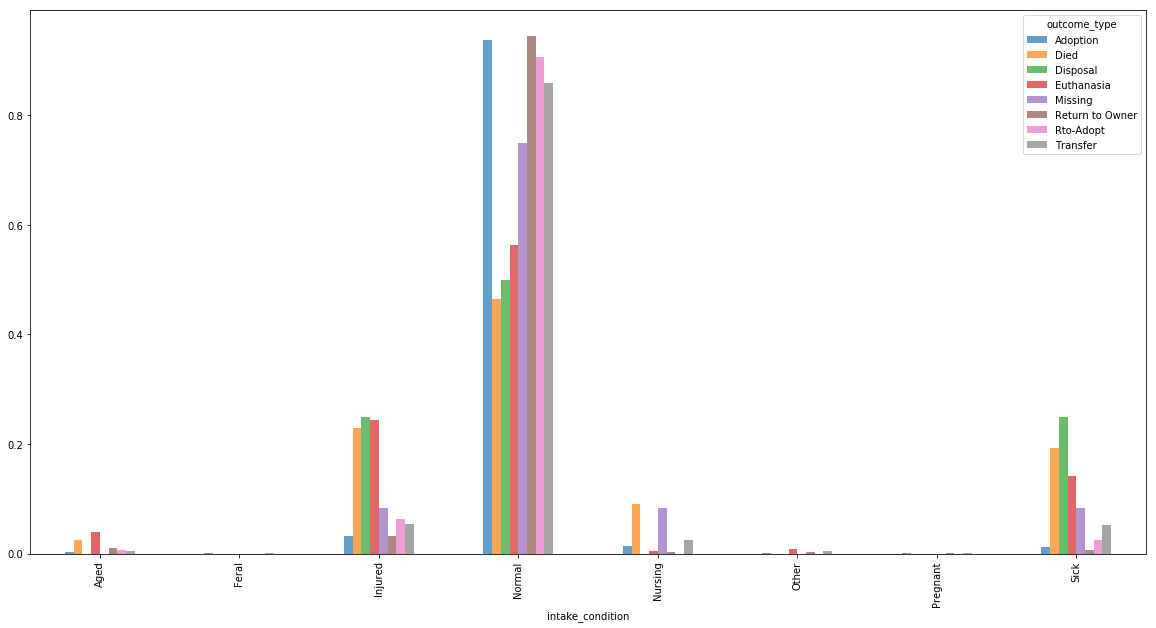

In [10]:
counts = pd.crosstab(unique_df.intake_condition, unique_df.outcome_type)
(counts / counts.sum()).plot.bar(figsize=(20,10), alpha=0.7)

#### If injured/sick dogs are more likely to be euthanized compared to normal dogs

In [110]:
counts = pd.crosstab(unique_df.intake_condition,(unique_df.outcome_type=="Euthanasia"))
counts

outcome_type,False,True
intake_condition,,
Aged,208,52
Feral,8,0
Injured,1502,328
Normal,35474,760
Nursing,548,7
Other,86,10
Pregnant,33,0
Sick,823,191


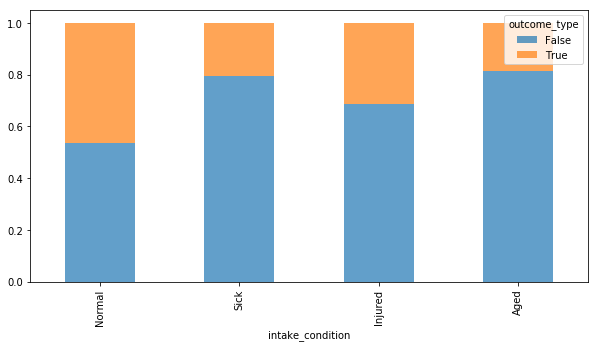

In [126]:
other_counts = counts.sum(axis=1)
euth_given_intake = counts.divide(other_counts, axis=0)
euth_given_intake.loc[['Normal', 'Sick', "Injured", "Aged"]].plot.bar(stacked=True, alpha=0.7, figsize=(10,5))

#### Which intake condition gets adopted the most?

In [122]:
counts = pd.crosstab(unique_df.intake_condition,(unique_df.outcome_type=="Adoption"))
counts

outcome_type,False,True
intake_condition,,
Aged,212,48
Feral,6,2
Injured,1257,573
Normal,19402,16832
Nursing,309,246
Other,66,30
Pregnant,21,12
Sick,806,208


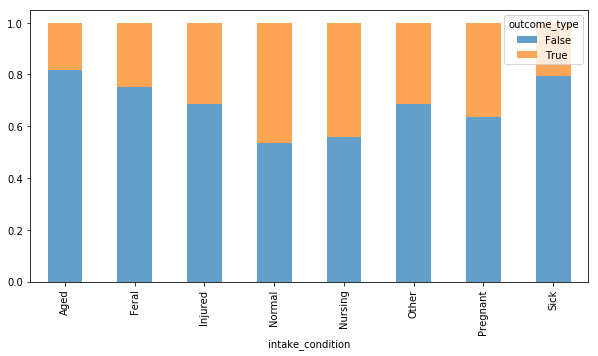

In [125]:
other_counts = counts.sum(axis=1)
euth_given_intake = counts.divide(other_counts, axis=0)
euth_given_intake.plot.bar(stacked=True, alpha=0.7, figsize=(10,5))

#### Does the outcome of a dog change based on gender?

In [13]:
counts = pd.crosstab(unique_df.outcome_type, unique_df.sex)

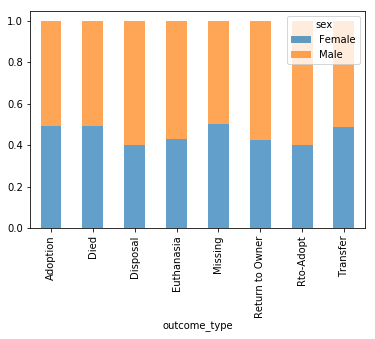

In [14]:
other_counts = counts.sum(axis=1)
outcome_given_sex = counts.divide(other_counts, axis=0)
outcome_given_sex.plot.bar(stacked=True, alpha=0.7)

#### What is the most common abandoned dog breed?

In [15]:
unique_df.breed.value_counts()[:10]

Pit Bull Mix                 4705
Chihuahua Shorthair Mix      4644
Labrador Retriever Mix       4237
German Shepherd Mix          1781
Australian Cattle Dog Mix     954
Dachshund Mix                 773
Miniature Poodle Mix          582
Border Collie Mix             573
Boxer Mix                     560
Yorkshire Terrier Mix         476
Name: breed, dtype: int64

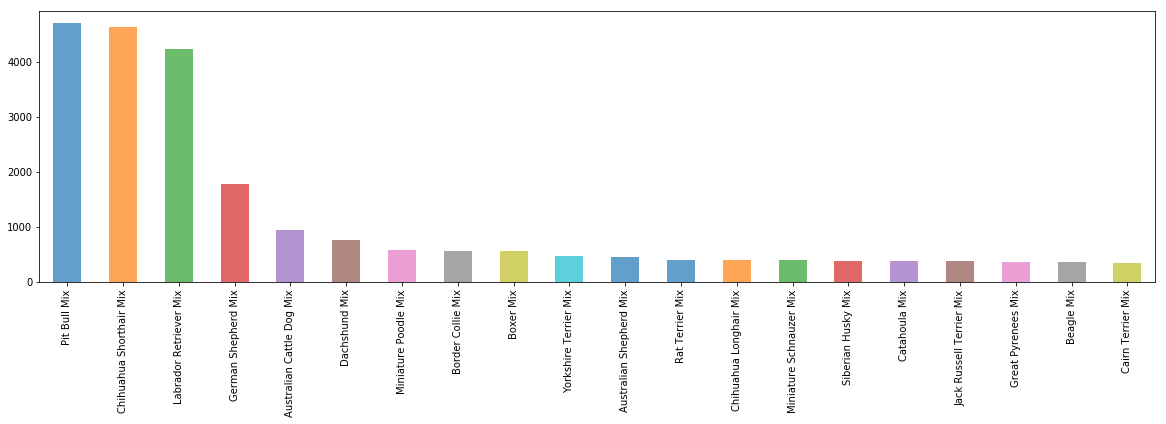

In [16]:
unique_df.breed.value_counts()[:20].plot.bar(figsize=(20,5), alpha=0.7)

#### What is the most common adopted dog breed?
*normalie??*

In [17]:
unique_df.loc[(unique_df.in_shelter == "No") 
              & (unique_df.outcome_type=="Adoption")].breed.value_counts()[:10]

Chihuahua Shorthair Mix      2148
Labrador Retriever Mix       2134
Pit Bull Mix                 1726
German Shepherd Mix           857
Australian Cattle Dog Mix     510
Dachshund Mix                 360
Border Collie Mix             317
Boxer Mix                     244
Miniature Poodle Mix          236
Australian Shepherd Mix       225
Name: breed, dtype: int64

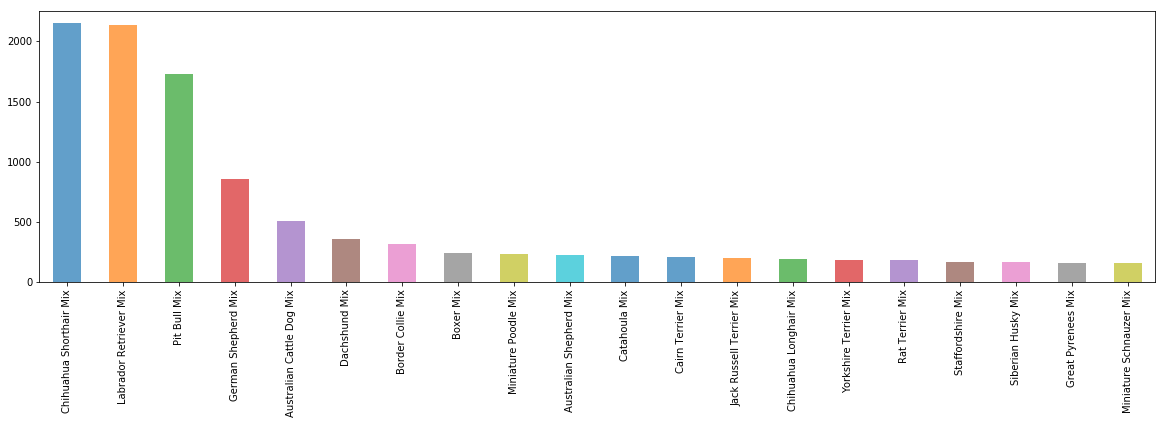

In [18]:
unique_df.loc[(unique_df.in_shelter == "No") 
              & (unique_df.outcome_type=="Adoption")].breed.value_counts()[:20].plot.bar(figsize=(20,5), alpha=0.7)

#### Most common time a dog is admitted

In [19]:
unique_df.date_in = unique_df.date_in.apply(pd.to_datetime)

In [86]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
years = [2014,2015,2016,2017,2018]

In [60]:
admission_by_month = pd.DataFrame(index=months , columns=years)

In [67]:
for year in years:
    for month in months:
        temp = unique_df.date_in.apply(lambda x: (x.month==month) & (x.year==year)).value_counts()
        admission_by_month.loc[month,year] = temp[1]

In [68]:
admission_by_month

,2014,2015,2016,2017,2018
1,706,636,586,579,524
2,629,584,564,587,497
3,702,640,594,579,576
4,684,631,561,539,577
5,751,690,725,600,570
6,669,720,605,583,576
7,718,581,507,591,620
8,625,612,550,591,582
9,687,568,520,695,670
10,633,618,495,576,715


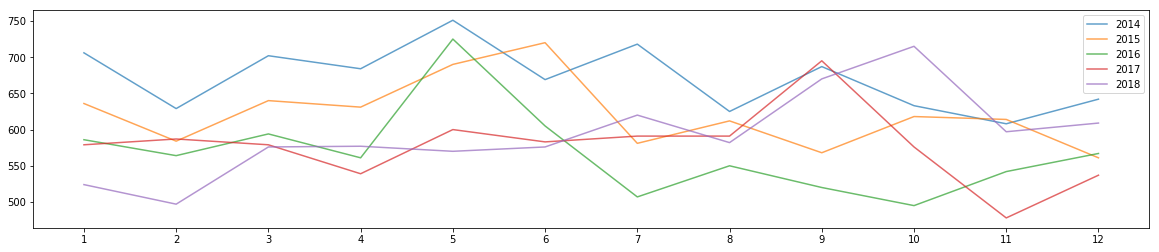

In [76]:
admission_by_month.plot.line(xticks=months, figsize=(20,4),alpha=0.7)

**Explanation:**

Milennials are adopting dogs instead of having kids

https://www.forbes.com/sites/erinlowry/2016/08/31/why-are-so-many-millennials-opting-for-pets-not-parenthood/#cf4aafe39633

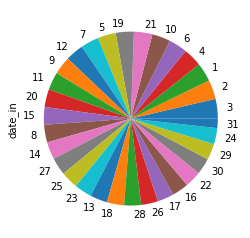

In [21]:
unique_df.date_in.apply(lambda x: x.day).value_counts().plot.pie()

#### Most common time a dog is adopted

In [22]:
unique_df.date_out = unique_df.date_out.apply(pd.to_datetime)

In [77]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
years = [2014,2015,2016,2017,2018]

In [79]:
adoption_by_month = pd.DataFrame(index=months , columns=years)

In [80]:
for year in years:
    for month in months:
        
        temp = unique_df[unique_df.outcome_type=="Adoption"].date_in.apply(lambda x: (x.month==month) & (x.year==year)).value_counts()
        
        adoption_by_month.loc[month,year] = temp[1]

In [82]:
adoption_by_month

,2014,2015,2016,2017,2018
1,306,301,265,318,257
2,286,276,268,258,264
3,284,296,272,233,291
4,274,248,263,244,267
5,285,283,360,281,257
6,286,320,316,287,284
7,323,237,269,276,280
8,293,285,295,288,297
9,288,229,254,255,290
10,252,240,238,276,353


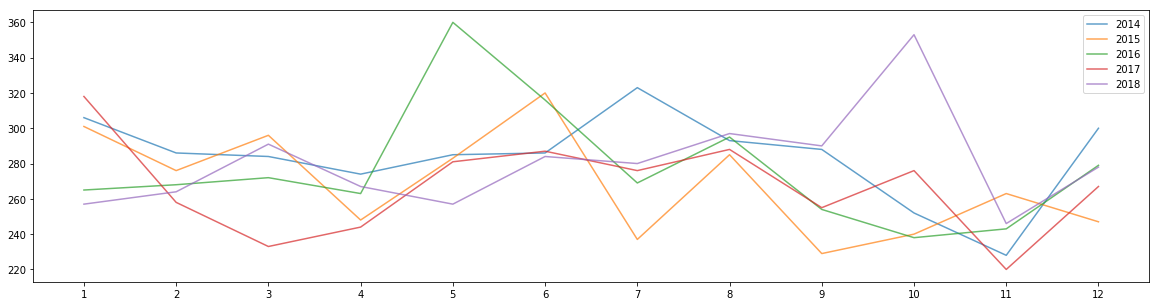

In [85]:
adoption_by_month.plot.line(xticks=months, figsize=(20,5),alpha=0.7)

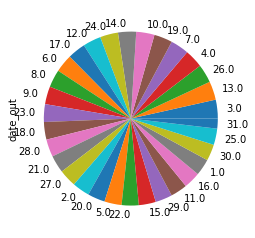

In [24]:
unique_df.date_out.apply(lambda x: x.day).value_counts().plot.pie()

#### Most common age of admitted dogs

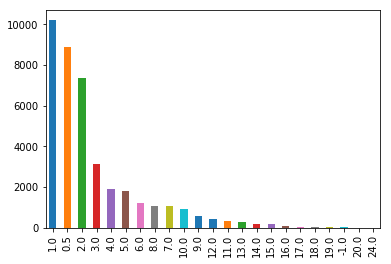

In [25]:
unique_df.age_in.value_counts().plot.bar()

#### Most common age of adopted dogs

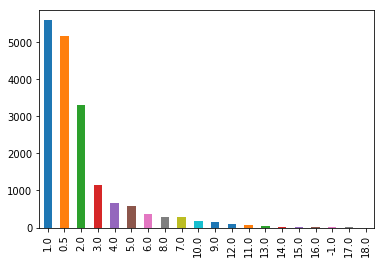

In [26]:
unique_df.loc[unique_df.outcome_type == "Adoption"]['age_out'].value_counts().plot.bar()

#### What is the best age to abandon your dog to ensure that it will be better adopted?



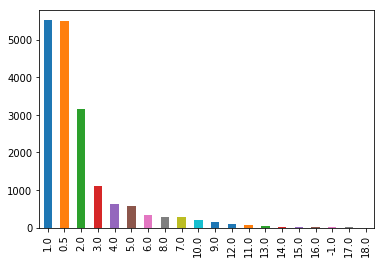

In [27]:
unique_df.loc[unique_df.outcome_type == "Adoption"]['age_in'].value_counts().plot.bar()

#### How many surrendered dogs were returned to their owners?

In [140]:
((unique_df.intake_type=="Owner Surrender")&(unique_df.outcome_type=="Return to Owner")).value_counts()

False    39636
True       394
dtype: int64

In [146]:
unique_df[((unique_df.intake_type=="Owner Surrender")&(unique_df.outcome_type=="Return to Owner"))].time_in_shelter.max()

'98 days 03:32:00.000000000'

In [147]:
unique_df[((unique_df.intake_type=="Owner Surrender")&(unique_df.outcome_type=="Return to Owner"))].time_in_shelter.min()

'0 days 00:09:00.000000000'

In [28]:
unique_df

,breed,color,date_in,found_location,intake_condition,intake_type,name,sex,fixed,date_of_birth,date_out,outcome_subtype,outcome_type,in_shelter,time_in_shelter,age_in,age_out
animal_id,,,,,,,,,,,,,,,,,
A786884,Beagle Mix,['Tricolor'],2019-01-03 16:19:00,2501 Magin Meadow Dr Austin,Normal,Stray,Brock,Male,Yes,2017-01-03 00:00:00,2019-01-08 15:11:00,Partner,Transfer,No,4 days 22:52:00.000000000,2.0,2.0
A706918,English Springer Spaniel,"['White', 'Liver']",2015-07-05 12:59:00,9409 Bluegrass Dr Austin,Normal,Stray,Belle,Female,Yes,2007-07-05 00:00:00,2015-07-05 15:13:00,NaN,Return to Owner,No,0 days 02:14:00.000000000,8.0,8.0
A724273,Basenji Mix,"['Sable', 'White']",2016-04-14 18:43:00,2818 Palomino Trail Austin,Normal,Stray,Runster,Male,No,2015-04-17 00:00:00,2016-04-21 17:17:00,NaN,Return to Owner,No,6 days 22:34:00.000000000,1.0,1.0
A778404,German Shepherd Mix,"['Black', 'Tan']",2018-08-14 10:19:00,Austin,Normal,Owner Surrender,Max,Male,No,2014-08-14 00:00:00,2018-08-17 18:03:00,NaN,Adoption,No,3 days 07:44:00.000000000,4.0,4.0
A682524,Doberman Pinsch/Australian Cattle Dog,"['Tan', 'Gray']",2014-06-29 10:38:00,800 Grove Blvd Austin,Normal,Stray,Rio,Male,Yes,2010-06-29 00:00:00,2014-07-02 14:16:00,NaN,Return to Owner,No,3 days 03:38:00.000000000,4.0,4.0
A743852,Labrador Retriever Mix,['Chocolate'],2017-02-18 12:46:00,Austin,Normal,Owner Surrender,Odin,Male,Yes,2015-02-18 00:00:00,2017-02-21 17:44:00,NaN,Return to Owner,No,3 days 04:58:00.000000000,2.0,2.0
A708452,Labrador Retriever Mix,"['Black', 'White']",2015-07-30 14:37:00,Austin,Normal,Public Assist,Mumble,Male,No,2013-07-28 00:00:00,2015-08-04 18:17:00,NaN,Return to Owner,No,5 days 03:40:00.000000000,2.0,2.0
A760053,Chihuahua Shorthair,"['White', 'Tan']",2017-10-11 15:46:00,8800 South First Street Austin,Normal,Stray,NaN,Male,No,2015-10-11 00:00:00,2017-10-15 18:30:00,NaN,Adoption,No,4 days 02:44:00.000000000,2.0,2.0
A707375,Pit Bull,"['Brown', 'White']",2015-07-11 18:19:00,Galilee Court And Damita Jo Dr Manor,Normal,Stray,Candy Cane,Female,No,2015-01-11 00:00:00,2015-11-28 17:31:00,NaN,Adoption,No,139 days 23:12:00.000000000,0.5,1.0


In [ ]:
unique